# EDA - versión 1

## Carga de librerías y datos



In [ ]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# ChCC
df = pd.read_csv("/content/drive/MyDrive/proyecto PPP/Datos/Bases unidas/df_AP_agregado.csv")

In [ ]:
df.head()

año  family id  family member id                           organisation  \
0  2021       6378              7546  ChCC-Municipalidad de Alto del Carmen   
1  2021       6378              7547  ChCC-Municipalidad de Alto del Carmen   
2  2021       6379              7548  ChCC-Municipalidad de Alto del Carmen   
3  2021       6379              7549  ChCC-Municipalidad de Alto del Carmen   
4  2021       6380              7550  ChCC-Municipalidad de Alto del Carmen   

                   practitioner noinhousehold  \
0  karolriveragajardo@gmail.com             3   
1  karolriveragajardo@gmail.com             3   
2  karolriveragajardo@gmail.com             4   
3  karolriveragajardo@gmail.com             4   
4  karolriveragajardo@gmail.com             4   

                                         dd  \
0                Desorden de salud mental,    
1                Desorden de salud mental,    
2  Condición o impedimento motor (físico),    
3  Condición o impedimento motor (físico),    
4                                       NaN   

                                           household            income  \
0                                                NaN  $20001 to $30000   
1                                                NaN  $20001 to $30000   
2  Familia nuclear viviendo con familia extensa (...   Menos de $20000   
3  Familia nuclear viviendo con familia extensa (...   Menos de $20000   
4  Familia nuclear viviendo con familia extensa (...  $20001 to $30000   

   neighbourhood  ...  \
0            NaN  ...   
1            NaN  ...   
2            NaN  ...   
3            NaN  ...   
4            NaN  ...   

  survey_encuesta de experiencia de parentalidad_conducta infantil_pre  \
0                                                NaN                     
1                                                NaN                     
2                                                NaN                     
3                                                NaN                     
4                                                NaN                     

   survey_encuesta de experiencia de parentalidad_confianza en la parentalidad_  \
0                                                NaN                              
1                                                NaN                              
2                                                NaN                              
3                                                NaN                              
4                                                NaN                              

  survey_encuesta de experiencia de parentalidad_confianza en la parentalidad_post  \
0                                                NaN                                 
1                                                NaN                                 
2                                                NaN                                 
3                                                NaN                                 
4                                                NaN                                 

  survey_encuesta de experiencia de parentalidad_confianza en la parentalidad_pre  \
0                                                NaN                                
1                                                NaN                                
2                                                NaN                                
3                                                NaN                                
4                                                NaN                                

  survey_encuesta de experiencia de parentalidad_experiencias_  \
0                                                NaN             
1                                                NaN             
2                                                NaN             
3                                                NaN             
4                                                NaN 

## Variables

In [ ]:
bins = [5*i for i in range(21)]

## Funciones

In [ ]:
# lista de columnas de un dataframe, formato lista iterable
def lista_columnas(df):
  col = []
  for i in df.columns:
    col.append(i)
  return col

In [ ]:
def ver_columnas(df):
  cols = lista_columnas(df)
  for i in range(len(cols)):
    print(f"{i}.-", cols[i])

In [ ]:
# ver catidad de NA por columna, formato tabla o histograma
def ver_na(df, l=True, h=False, bins = bins):
  columnas = []
  porcentaje_nulos= []
  for i in range(len(df.columns)):
    columnas.append(df.columns[i])
    porcentaje_nulos.append(np.round(df.isna().sum()[i]/np.shape(df)[0]*100))

  if l == True:
    for i in range(len(df.columns)):
      print(f"{i}.-", porcentaje_nulos[i])

  if h == True:
    #np.histogram(np.array(porcentaje_nulos))
    plt.hist(np.array(porcentaje_nulos), bins = bins)#, title="columnas según % de NA")
    plt.title("histogram")
    plt.show()

In [ ]:
#  borrar columnas por porcentaje de NA
def filtro_columnas(df, porcentaje): # % es el % de datos nulos permitidos
  NA_X = df.isna().sum()
  columnas_con_datos=[]
  for i in range(len(df.columns)):
    porcentaje_NA = np.round(NA_X[i]/np.shape(df)[0]*100)
    if porcentaje_NA < porcentaje:
      columnas_con_datos.append(df.columns[i])
  return df[columnas_con_datos]

In [ ]:
# borrar filas con NA y ver cuantas sobreviven
def size_tras_drop_na(df, ver = True, ret = False):
  df2 = df.copy()
  df2 = df2.dropna()
  if ver == True:
    display(np.shape(df2))
  if ret == True:
    return(df2)

In [ ]:
def mini_filtro(df, porcentaje):
  print("DATOS PROCESADOS")
  print("histograma de columnas segun porcentaje de NA")
  df2 = filtro_columnas(df, porcentaje)
  ver_na(df2, False, True, 20)
  print("\n")
  print("tamaño de la base:")
  print(size_tras_drop_na(df2))

## Tratamiento de columnas sin datos

In [ ]:
ver_columnas(df)

0.- año
1.- family id
2.- family member id
3.- organisation
4.- practitioner
5.- noinhousehold
6.- dd
7.- household
8.- income
9.- neighbourhood
10.- postal
11.- complete
12.- edad
13.- género
14.- beneficio
15.- education
16.- employment
17.- horas
18.- institucion
19.- marital status
20.- relationship
21.- seek professional
22.- seek professional partner
23.- survey_cuestionario de satisfacción del cliente (csq) (post only)_media_
24.- survey_cuestionario de satisfacción del cliente (csq) (post only)_media_post
25.- survey_cuestionario de satisfacción del cliente (csq) (post only)_q10_
26.- survey_cuestionario de satisfacción del cliente (csq) (post only)_q10_post
27.- survey_cuestionario de satisfacción del cliente (csq) (post only)_q11_
28.- survey_cuestionario de satisfacción del cliente (csq) (post only)_q11_post
29.- survey_cuestionario de satisfacción del cliente (csq) (post only)_q12_
30.- survey_cuestionario de satisfacción del cliente (csq) (post only)_q12_post
31.- survey_c

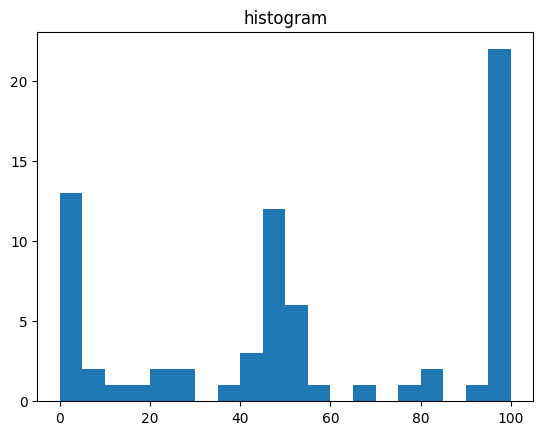

In [ ]:
ver_na(df, l=False, h=True, bins=20)

In [ ]:
ver_na(df)

0.- 0.0
1.- 0.0
2.- 0.0
3.- 0.0
4.- 0.0
5.- 9.0
6.- 84.0
7.- 39.0
8.- 42.0
9.- 100.0
10.- 80.0
11.- 100.0
12.- 2.0
13.- 0.0
14.- 13.0
15.- 0.0
16.- 0.0
17.- 53.0
18.- 15.0
19.- 5.0
20.- 1.0
21.- 75.0
22.- 94.0
23.- 100.0
24.- 45.0
25.- 100.0
26.- 45.0
27.- 100.0
28.- 45.0
29.- 100.0
30.- 45.0
31.- 100.0
32.- 45.0
33.- 100.0
34.- 44.0
35.- 100.0
36.- 44.0
37.- 100.0
38.- 45.0
39.- 100.0
40.- 45.0
41.- 100.0
42.- 45.0
43.- 100.0
44.- 45.0
45.- 100.0
46.- 45.0
47.- 100.0
48.- 57.0
49.- 100.0
50.- 45.0
51.- 100.0
52.- 45.0
53.- 100.0
54.- 51.0
55.- 24.0
56.- 100.0
57.- 69.0
58.- 50.0
59.- 100.0
60.- 51.0
61.- 25.0
62.- 100.0
63.- 51.0
64.- 24.0
65.- 100.0
66.- 51.0
67.- 25.0
68.- 0.0
69.- 0.0
70.- 0.0


In [ ]:
df_99 = filtro_columnas(df, 100)

In [ ]:
np.shape(df_99)

(3890, 49)

In [ ]:
ver_na(df_99)

0.- 0.0
1.- 0.0
2.- 0.0
3.- 0.0
4.- 0.0
5.- 9.0
6.- 84.0
7.- 39.0
8.- 42.0
9.- 80.0
10.- 2.0
11.- 0.0
12.- 13.0
13.- 0.0
14.- 0.0
15.- 53.0
16.- 15.0
17.- 5.0
18.- 1.0
19.- 75.0
20.- 94.0
21.- 45.0
22.- 45.0
23.- 45.0
24.- 45.0
25.- 45.0
26.- 44.0
27.- 44.0
28.- 45.0
29.- 45.0
30.- 45.0
31.- 45.0
32.- 45.0
33.- 57.0
34.- 45.0
35.- 45.0
36.- 51.0
37.- 24.0
38.- 69.0
39.- 50.0
40.- 51.0
41.- 25.0
42.- 51.0
43.- 24.0
44.- 51.0
45.- 25.0
46.- 0.0
47.- 0.0
48.- 0.0


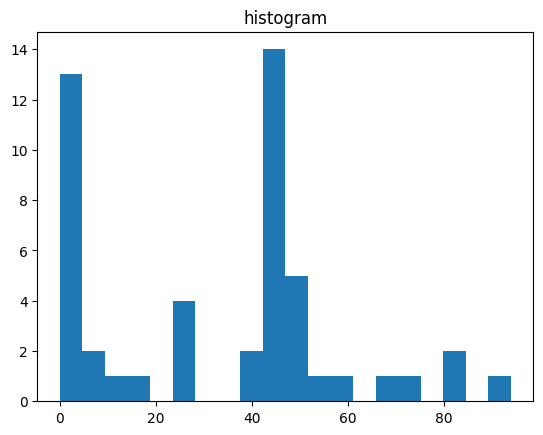

In [ ]:
ver_na(df_99, False, True, 20)

In [ ]:
ver_columnas(df_99)

0.- año
1.- family id
2.- family member id
3.- organisation
4.- practitioner
5.- noinhousehold
6.- dd
7.- household
8.- income
9.- postal
10.- edad
11.- género
12.- beneficio
13.- education
14.- employment
15.- horas
16.- institucion
17.- marital status
18.- relationship
19.- seek professional
20.- seek professional partner
21.- survey_cuestionario de satisfacción del cliente (csq) (post only)_media_post
22.- survey_cuestionario de satisfacción del cliente (csq) (post only)_q10_post
23.- survey_cuestionario de satisfacción del cliente (csq) (post only)_q11_post
24.- survey_cuestionario de satisfacción del cliente (csq) (post only)_q12_post
25.- survey_cuestionario de satisfacción del cliente (csq) (post only)_q13_post
26.- survey_cuestionario de satisfacción del cliente (csq) (post only)_q1_post
27.- survey_cuestionario de satisfacción del cliente (csq) (post only)_q2_post
28.- survey_cuestionario de satisfacción del cliente (csq) (post only)_q3_post
29.- survey_cuestionario de satisfa

## Separación X e Y

In [ ]:
lista_columnas(df_99)

['año',
 'family id',
 'family member id',
 'organisation',
 'practitioner',
 'noinhousehold',
 'dd',
 'household',
 'income',
 'postal',
 'edad',
 'género',
 'beneficio',
 'education',
 'employment',
 'horas',
 'institucion',
 'marital status',
 'relationship',
 'seek professional',
 'seek professional partner',
 'survey_cuestionario de satisfacción del cliente (csq) (post only)_media_post',
 'survey_cuestionario de satisfacción del cliente (csq) (post only)_q10_post',
 'survey_cuestionario de satisfacción del cliente (csq) (post only)_q11_post',
 'survey_cuestionario de satisfacción del cliente (csq) (post only)_q12_post',
 'survey_cuestionario de satisfacción del cliente (csq) (post only)_q13_post',
 'survey_cuestionario de satisfacción del cliente (csq) (post only)_q1_post',
 'survey_cuestionario de satisfacción del cliente (csq) (post only)_q2_post',
 'survey_cuestionario de satisfacción del cliente (csq) (post only)_q3_post',
 'survey_cuestionario de satisfacción del cliente (csq

In [ ]:
col_X = ['año',
 'family id',
 'family member id',
 'organisation',
 'practitioner',
 'noinhousehold',
 'dd',
 'household',
 'income',
 'postal',
 'edad',
 'género',
 'beneficio',
 'education',
 'employment',
 'horas',
 'institucion',
 'marital status',
 'relationship',
 'seek professional',
 'seek professional partner',
 'programa',
 'nivel',
 'rango etario']

In [ ]:
col_Y = ['survey_cuestionario de satisfacción del cliente (csq) (post only)_media_post',
 'survey_cuestionario de satisfacción del cliente (csq) (post only)_q10_post',
 'survey_cuestionario de satisfacción del cliente (csq) (post only)_q11_post',
 'survey_cuestionario de satisfacción del cliente (csq) (post only)_q12_post',
 'survey_cuestionario de satisfacción del cliente (csq) (post only)_q13_post',
 'survey_cuestionario de satisfacción del cliente (csq) (post only)_q1_post',
 'survey_cuestionario de satisfacción del cliente (csq) (post only)_q2_post',
 'survey_cuestionario de satisfacción del cliente (csq) (post only)_q3_post',
 'survey_cuestionario de satisfacción del cliente (csq) (post only)_q4_post',
 'survey_cuestionario de satisfacción del cliente (csq) (post only)_q5_post',
 'survey_cuestionario de satisfacción del cliente (csq) (post only)_q6_post',
 'survey_cuestionario de satisfacción del cliente (csq) (post only)_q7_post',
 'survey_cuestionario de satisfacción del cliente (csq) (post only)_q8_post',
 'survey_cuestionario de satisfacción del cliente (csq) (post only)_q9_post',
 'survey_cuestionario de satisfacción del cliente (csq) (post only)_total_post',
 'survey_encuesta de experiencia de parentalidad_apoyo como padre o madre_post',
 'survey_encuesta de experiencia de parentalidad_apoyo como padre o madre_pre',
 'survey_encuesta de experiencia de parentalidad_apoyo de la pareja_post',
 'survey_encuesta de experiencia de parentalidad_apoyo de la pareja_pre',
 'survey_encuesta de experiencia de parentalidad_conducta infantil_post',
 'survey_encuesta de experiencia de parentalidad_conducta infantil_pre',
 'survey_encuesta de experiencia de parentalidad_confianza en la parentalidad_post',
 'survey_encuesta de experiencia de parentalidad_confianza en la parentalidad_pre',
 'survey_encuesta de experiencia de parentalidad_experiencias_post',
 'survey_encuesta de experiencia de parentalidad_experiencias_pre']

In [ ]:
df_X = df[col_X]

In [ ]:
df_Y = df[col_Y]

## Tratamiento columnas X

DATOS PROCESADOS
histograma de columnas segun porcentaje de NA


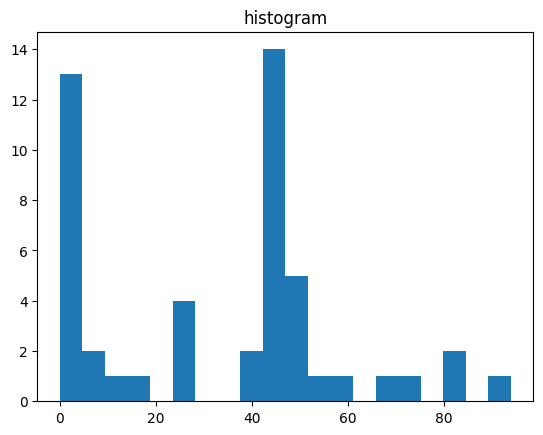



tamaño de la base:


(0, 49)

None


In [ ]:
#todo el dataset
mini_filtro(df_99, 100)

DATOS PROCESADOS
histograma de columnas segun porcentaje de NA


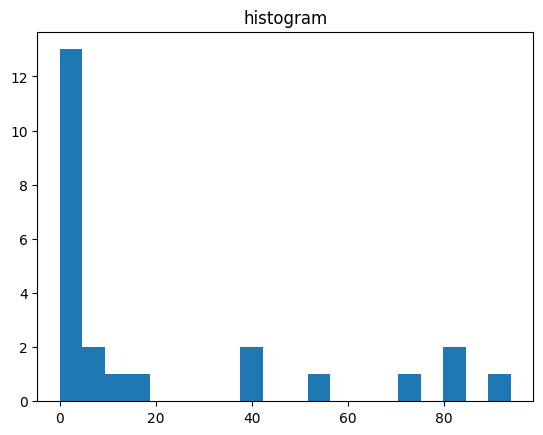



tamaño de la base:


(1, 24)

None


In [ ]:
mini_filtro(df_X, 100)

DATOS PROCESADOS
histograma de columnas segun porcentaje de NA


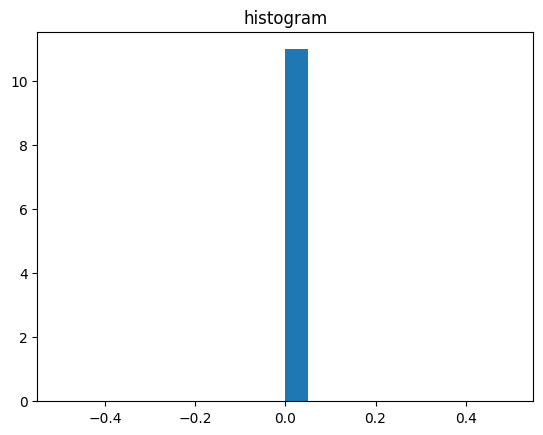



tamaño de la base:


(3877, 11)

None


In [ ]:
mini_filtro(df_X, 1)

## Tratamiento de columnas Y

DATOS PROCESADOS
histograma de columnas segun porcentaje de NA


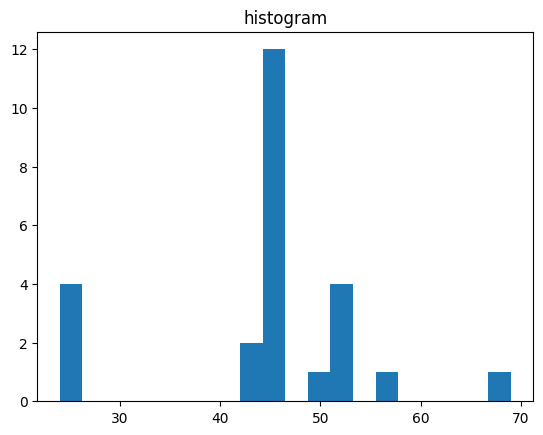



tamaño de la base:


(981, 25)

None


In [ ]:
mini_filtro(df_Y, 100)

DATOS PROCESADOS
histograma de columnas segun porcentaje de NA


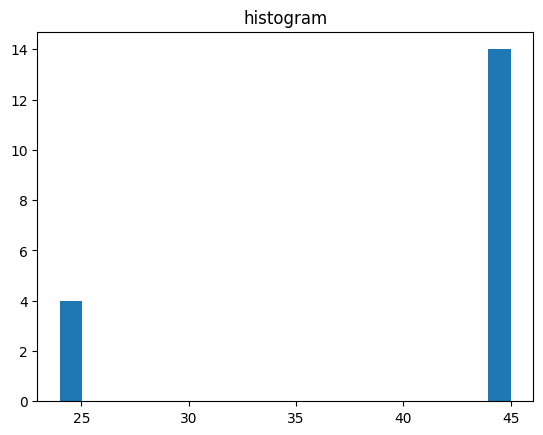



tamaño de la base:


(1983, 18)

None


In [ ]:
mini_filtro(df_Y, 50)

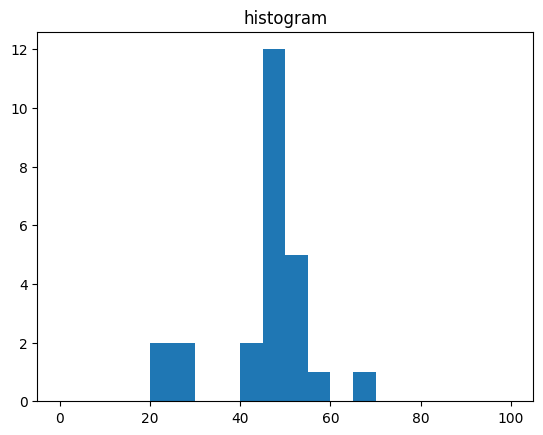

In [ ]:
ver_na(df_Y, False, True, bins)

### tipo de variables

In [ ]:
tipo_var = []
for i in range(len(df.dtypes)):
  tipo_var.append(df.dtypes[i])
  print(f"{i}.- {columnas[i]}:  ", df.dtypes[i])

0.- año:   int64
1.- family id:   int64
2.- family member id:   int64
3.- organisation:   object
4.- practitioner:   object
5.- noinhousehold:   object
6.- dd:   object
7.- household:   object
8.- income:   object
9.- neighbourhood:   float64
10.- postal:   object
11.- complete:   float64
12.- edad:   object
13.- género:   object
14.- beneficio:   object
15.- education:   object
16.- employment:   object
17.- horas:   object
18.- institucion:   object
19.- marital status:   object
20.- relationship:   object
21.- seek professional:   object
22.- seek professional partner:   object
23.- survey_cuestionario de satisfacción del cliente (csq) (post only)_media_:   float64
24.- survey_cuestionario de satisfacción del cliente (csq) (post only)_media_post:   float64
25.- survey_cuestionario de satisfacción del cliente (csq) (post only)_q10_:   float64
26.- survey_cuestionario de satisfacción del cliente (csq) (post only)_q10_post:   float64
27.- survey_cuestionario de satisfacción del cliente

## Observaciones

## Cambios a la data

- Se revisa la base de datos y se nota que hay datos que no están en un formato adecuado, como variables categóricas que tienen tipo "Object" que deberían ser "Categoric".
- La variable id se pasa a "str".